Amongst the leading job portals in India, Indeed is used to search for jobs from across the country. Indeed is also playing its role in provided jobs during this pandemic through its Coronavirus Job Resources.The 15-year-old US-based site, considered as one of the best job portals in India, has expanded its reach to more than 60 countries worldwide.  

#### Indeed have :
Facebook followers – 1,919,726  <br> Twitter followers – 222K

###### Let's explore the data :

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import SVG, display
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [2]:
df=pd.read_csv('indeed_datasciencejob.csv')

In [3]:
df.head()

,JobTitle,Salary,CompanyName,CompanyRating,JobLocation,Summary,Date
0,Data Science-DL-,NaN,Aditya Birla Group,4.1,Maharashtra,"As such, the role of a data scientist is respo...",Today
1,Data Science Intern,12000 a month,Virtual Sense Global Technologies,NaN,"Pune, Maharashtra",Virtual Sense is a digital health company work...,13 days ago
2,Data Science Internship,8000 - 15000 a month,Quadratyx,2.0,"Hyderabad, Telangana",Demonstrate skills working with teams to deliv...,Today
3,Data Analyst,600000 - 1000000 a year,Bombinate Technologies (Koo App),NaN,"Jayanagar, Bengaluru, Karnataka",Work closely with the data science team to hel...,Today
4,Data Scientist,40000 - 60000 a month,INEXTURE SOLUTIONS,4.5,"Ahmedabad, Gujarat","Understanding of data structures, data modelin...",Just posted


In [4]:
df.tail()

,JobTitle,Salary,CompanyName,CompanyRating,JobLocation,Summary,Date
900,Senior Associate - Geospatial Lab (Image Proce...,NaN,Indian Institute for Human Settlements,4.3,"Bengaluru, Karnataka",Prior work experience with urban data and urba...,1 day ago
901,BI/Tableau Developer - VP,NaN,AQR,NaN,"Bengaluru, Karnataka",Overall experience of 8+ Years on data visuali...,9 days ago
902,Customer Service Admin,NaN,"Agilent Technologies, Inc.",4.1,"Gurgaon, Haryana",Uses accounting and financial systems and tool...,2 days ago
903,Paid College Ambassadors/Representative Intern...,3000 a month,Ivy Professional School,NaN,Remote,Do you like to mingle with people?,16 days ago
904,Lead Data Engineer,NaN,Baker Hughes,4.0,"Mumbai, Maharashtra","Perform variety of in-depth data analysis, dat...",30+ days ago


In [5]:
df.dtypes

JobTitle          object
Salary            object
CompanyName       object
CompanyRating    float64
JobLocation       object
Summary           object
Date              object
dtype: object

In [6]:
df.describe(include=object)

,JobTitle,Salary,CompanyName,JobLocation,Summary,Date
count,905,172,905,905,905,905
unique,569,114,575,77,731,32
top,Data Scientist,5000 a month,Cognizant,"Bengaluru, Karnataka",Develop custom data models and algorithms to a...,30+ days ago
freq,87,6,19,283,7,351


In [7]:
def missing_data(data):
    total=df.isna().sum().sort_values(ascending=False)
    total=total[total !=0]
    percent=round(total/len(df)*100,2)
    data_type=df[data.isna().sum().sort_values(ascending=False)[data.isna().sum()!=0].index].dtypes
    return(pd.concat([total,percent,data_type],1,keys=['Total','Percent','Data_Type']))
missing_data(df)

,Total,Percent,Data_Type
Salary,733,80.99,object
CompanyRating,431,47.62,float64


 * Here 80.99% salary of job roles were not disclosed by the companies, we should delete the variable and pretend it never existed.
 * 47.62% companies were not rated by the indeed users, but here we can get top rated companies on indeed.So we should keep the variable and to ignore NaN value we will replace it to 0.1 rating.
 


In [8]:
df.drop(columns='Salary',inplace=True)

In [9]:
df['CompanyRating'] = df['CompanyRating'].fillna(0.1)

In [10]:
missing_data(df)

,Total,Percent,Data_Type


### let's dive deeper

In [11]:
df_temp=df.copy()

In [12]:
df_temp['JobTitle'].describe()

count                905
unique               569
top       Data Scientist
freq                  87
Name: JobTitle, dtype: object

 companies gave their job title as unique as possible,it's way of attracting jobseekers. <br> Lets generalise the Job titles as high as possible without lossing important data !

In [13]:
df_temp['JobTitle'].value_counts()[:50]

Data Scientist                                                                        87
Data Analyst                                                                          37
Data Engineer                                                                         35
Senior Data Scientist                                                                 10
Data Science Engineer                                                                 10
Data Science Internship                                                                8
Data Science Intern                                                                    7
Lead Data Scientist                                                                    6
Junior Data Analyst                                                                    6
Big Data Engineer                                                                      5
Data Science Developer                                                                 5
Data Science Trainer 

#### Observation for what makes same meaning job titles different 
* Using of lowercase anad uppercase
* Using differnt symbols
* Using Various synonyms,i.e. senior,sr.sr,lead,head all are almost similar meaning

In [14]:
df_temp['JobTitle']= df['JobTitle'].str.lower() #Lowercasing all letters

In [15]:
#Replace symbols with space
df_temp['JobTitle']=df_temp['JobTitle'].str.replace('_|-',' ')
df_temp['JobTitle']=df_temp['JobTitle'].str.replace('/',' ')
df_temp['JobTitle']=df_temp['JobTitle'].str.replace('  ',' ')

In [16]:
#Remove unnessecery numbers
df_temp['JobTitle']=df_temp['JobTitle'].str.replace('[^a-z\s]','')
#df_temp['JobTitle']=df_temp['JobTitle'].str.replace('\d','')

In [17]:
#Replace same types of words with one similer meaning word
df_temp['JobTitle']=df_temp['JobTitle'].str.replace('sr.|sr|lead|head|expert|specialist|manager','senior')
df_temp['JobTitle']=df_temp['JobTitle'].str.replace('jr.|jr|fresher','junior')
df_temp['JobTitle']=df_temp['JobTitle'].str.replace('science','scientist')
df_temp['JobTitle']=df_temp['JobTitle'].str.replace('analytics|analysts|analysis','analyst')
df_temp['JobTitle']=df_temp['JobTitle'].str.replace('development','developer')
df_temp['JobTitle']=df_temp['JobTitle'].str.replace('ml','machine learning')
df_temp['JobTitle']=df_temp['JobTitle'].str.replace('intern','internship')
df_temp['JobTitle']=df_temp['JobTitle'].str.replace('seniordata','senior data')


In [18]:
df1=df.copy()

In [19]:
df1['JobTitle']=df1['JobTitle'].apply(lambda x :x.replace('sr.|sr|lead|head|expert|specialist|manager','senior'))

In [20]:
df1['JobTitle']

0                                       Data Science-DL-
1                                    Data Science Intern
2                                Data Science Internship
3                                           Data Analyst
4                                         Data Scientist
                             ...                        
900    Senior Associate - Geospatial Lab (Image Proce...
901                            BI/Tableau Developer - VP
902                               Customer Service Admin
903    Paid College Ambassadors/Representative Intern...
904                                   Lead Data Engineer
Name: JobTitle, Length: 905, dtype: object

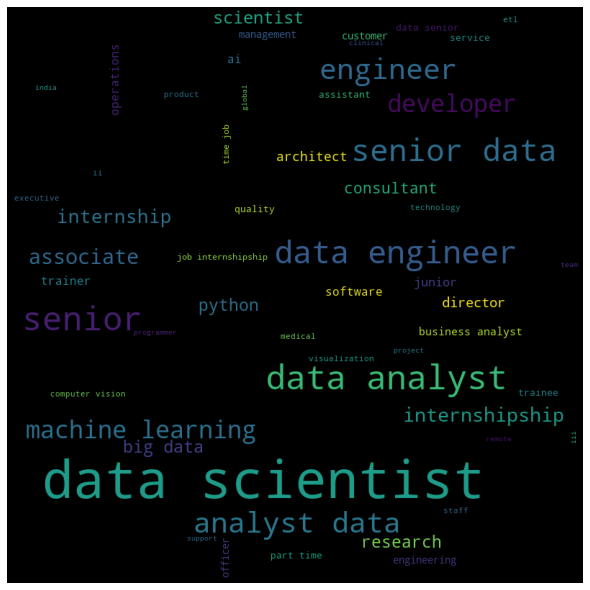

In [21]:
#Checking top used words in 'JobTitle'
functional_words = df_temp['JobTitle'].dropna().to_list()
tokenizer = RegexpTokenizer(r'\w+')
tokenized_list = [tokenizer.tokenize(i) for i in functional_words]
tokenized_list = [w for l in tokenized_list for w in l]
string = " ".join(w for w in tokenized_list)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(string) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### Top most used words in 'JobTitles' :  
data scientist,data analyst,senior,machine learning,data engineer,business analyst,
senior,associate,developer,derector,manager,trainer,associate,consultant,part time,big data,python
   

In [22]:
sel_index=df_temp[df_temp['JobTitle'].str.contains(r'\bdata\b|\bscientist\b|\bengineer\b|\bsenior\b|\banalyst\b|\bmanager\b|\binternship\b|\bmachine\slearning\b|\bbusiness\b|\bjunior\b|\btrainer\b|\bdeveloper\b|\bassociate\b|\bresearch\b|\bconsultant\b|\bcoordinator\b|\bjunior\b|\bbig\b|\bpython\b|\bpart\b|\btime\b')].index #searching for rows where one of top most used words present
df_temp.loc[sel_index,'JobTitle']=df_temp.loc[sel_index,'JobTitle'].str.replace(r'\b(?!data\b)(?!scientist\b)(?!engineer\b)(?!senior\b)(?!analyst\b)(?!manager\b)(?!internship\b)(?!business\b)(?!junior\b)(?!trainer\b)(?!developer\b)(?!associate\b)(?!research\b)(?!consultant\b)(?!coordinator\b)(?!junior\b)(?!big\b)(?!machine\b)(?!learning\b)(?!python\b)(?!part\b)(?!time\b)\w+','')
#remove other words except those words from selected row

In [23]:
unique_job=df_temp['JobTitle'].describe().unique()[1]
e=0
while unique_job!=e:
    unique_job=e
    df_temp['JobTitle']=df_temp['JobTitle'].str.replace(r'\s\s',' ') #remove double space
    df_temp['JobTitle']=df_temp['JobTitle'].str.replace(r"^\s+|\s+$",'') #remove space of start and end
    df_temp['JobTitle']=df_temp['JobTitle'].str.replace(r'\b(\w+)( \1\b)+',r'\1') #remove double words
    e=df_temp['JobTitle'].describe().unique()[1]
    

In [24]:
df_temp['JobTitle'].value_counts()[:50]

data scientist                              161
data analyst                                 72
data engineer                                64
senior data scientist                        41
senior                                       32
data                                         27
analyst                                      18
machine learning                             15
data scientist senior                        15
data senior                                  12
developer                                    12
engineer                                     11
data scientist engineer                      11
data scientist internship                    10
data scientist analyst                        9
big data                                      9
senior data engineer                          9
associate data scientist                      9
senior data analyst                           8
big data engineer                             8
data scientist trainer                  

Here some titles, data,senior,analyst,engineer should named as data scientist,senior data scientist,data analyst,data engineer respectively.

In [25]:
df_temp.loc[df_temp['JobTitle']=='data','JobTitle']='data scientist'
df_temp.loc[df_temp['JobTitle']=='analyst','JobTitle']='data analyst'
df_temp.loc[df_temp['JobTitle']=='scientist','JobTitle']='data scientist'
df_temp.loc[df_temp['JobTitle']=='engineer','JobTitle']='data engineer'
df_temp.loc[df_temp['JobTitle']=='data scientist engineer','JobTitle']='data engineer'
df_temp.loc[df_temp['JobTitle']=='senior','JobTitle']='senior data scientist'
df_temp.loc[df_temp['JobTitle']=='data scientist senior','JobTitle']='senior data scientist'
df_temp.loc[df_temp['JobTitle']=='data senior','JobTitle']='senior data scientist'
df_temp.loc[df_temp['JobTitle']=='internship','JobTitle']='data scientist internship'
df_temp.loc[df_temp['JobTitle']=='data internship','JobTitle']='data analyst internship'
df_temp.loc[df_temp['JobTitle']=='manager','JobTitle']='senior data scientist'
df_temp.loc[df_temp['JobTitle']=='data scientist analyst','JobTitle']='data analyst'
df_temp.loc[df_temp['JobTitle']=='data scientist analyst','JobTitle']='data analyst'
df_temp['JobTitle']=df_temp['JobTitle'].str.replace('analyst data scientist','data analyst')
df_temp['JobTitle']=df_temp['JobTitle'].str.replace('data scientist analyst','data analyst')
df_temp['JobTitle']=df_temp['JobTitle'].str.replace('data scientist data analyst','data analyst')

In [26]:
df_temp['JobTitle'].describe()

count                905
unique               211
top       data scientist
freq                 193
Name: JobTitle, dtype: object

Unique job count is not really satisfying but we have to stop here because of having possibility to loss really unque job titles.

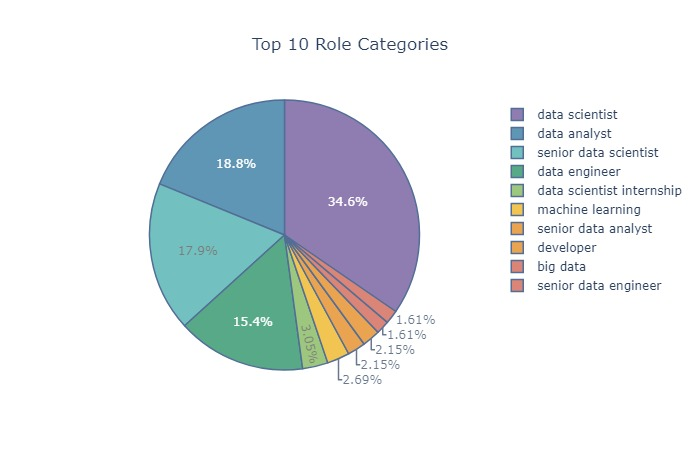

In [27]:
role = df_temp['JobTitle'].value_counts().nlargest(n=10)
fig = px.pie(role, 
       values = role.values, 
       names = role.index, 
       title="Top 10 Role Categories", 
       color=role.values,
       color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(opacity=0.7,
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_x=0.5)
fig.show(renderer="jpg")

As expected data scientist is in top and data analyst is  in secound position. Senior Data scientist and Data engineer have noticeable number.

In [28]:
df_temp.groupby('CompanyName')['CompanyRating'].mean().nlargest(20) #top rated company

CompanyName
3RI TECHNOLOGIES                                         5.0
Elan Academy                                             5.0
Diverse Lynx India                                       4.8
Phenom People                                            4.7
Narayana Medical College Hospital                        4.6
AQB Solutions Pvt Ltd                                    4.5
Center for Study of Science, Technology and Policy...    4.5
CoreCompete                                              4.5
Cytel, India                                             4.5
INEXTURE SOLUTIONS                                       4.5
Innoplexus                                               4.5
Scienaptic Systems                                       4.5
TISS                                                     4.5
Indian Institute Of Science                              4.4
Luxoft                                                   4.4
United Nations Development Programme (UNDP)              4.4
freshworks  

Strange !top big global company like microsoft,IBM are missing there,
<br> Lets check top  10 job vacancy available companies with their rating.

In [29]:
job=df_temp['CompanyName'].value_counts().nlargest(20) #top job vacancy company
com=df_temp['CompanyName'].value_counts().nlargest(20).index
rat=list()
comr=list()
for i in com:
    rat=str(round(df_temp.groupby('CompanyName').get_group(i)['CompanyRating'].mean(),2))
    comr.append(i+'('+rat+')')

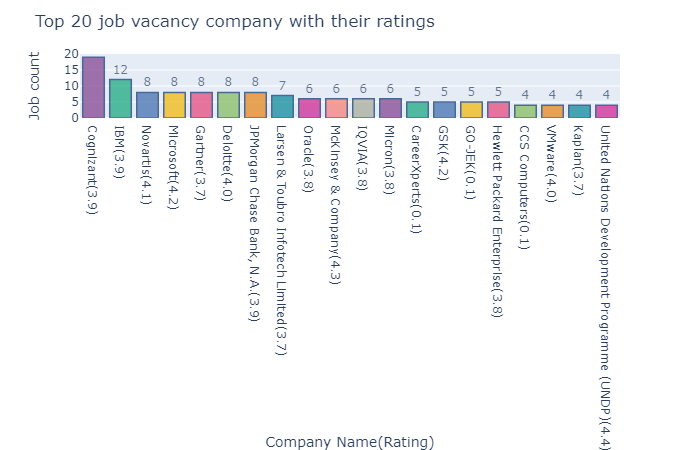

In [37]:
fig = px.bar(y=job,
             x=comr,
             orientation='v',
             color=comr,
             text=job,
             color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces( 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=900, 
                  showlegend=False, 
                  xaxis_title="Company Name(Rating)",
                  yaxis_title="Job count",
                  title="Top 20 job vacancy company with their ratings")
fig.show(renderer="png")

They are here with top job vacancies.Cognizant,IBM,Novartis,JP Morgan,Microsoft are very big names but they have avarage ratings and 19,12,8,8 job vacancies respectively.

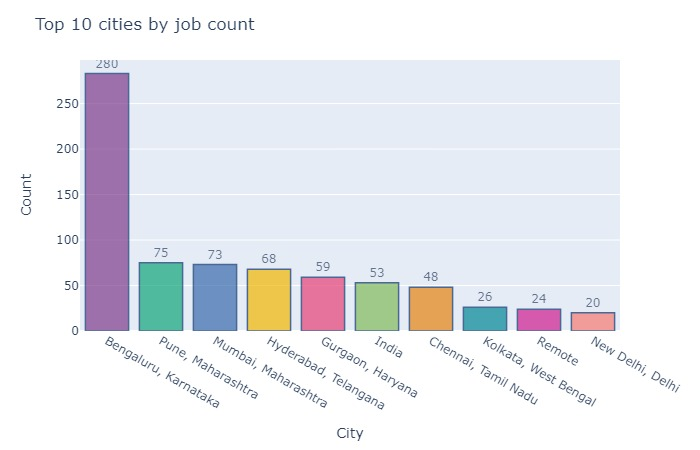

In [31]:
location = df_temp['JobLocation'].value_counts().nlargest(n=10)
fig = px.bar(y=location.values,
       x=location.index,
       orientation='v',
       color=location.index,
       text=location.values,
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=800, 
                  showlegend=False, 
                  xaxis_title="City",
                  yaxis_title="Count",
                  title="Top 10 cities by job count")
fig.show(renderer="jpg")


Bangalore and Mumbai are called the IT capital and the financial capital of India respectively. Thus, it's expected that these two cities will have the maximum number of jobs among cities in India.

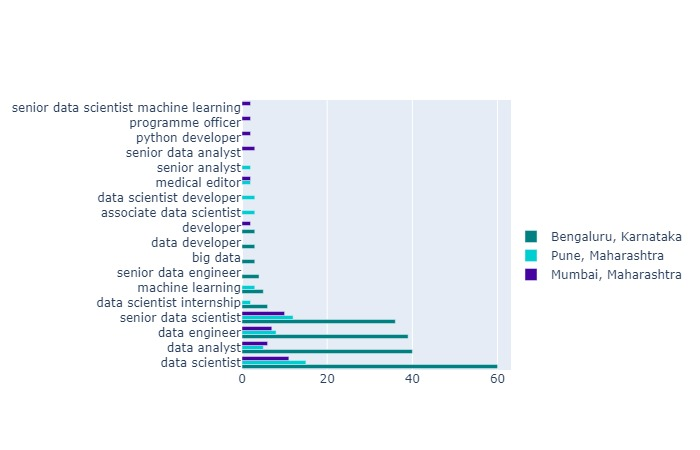

In [32]:
fig = go.Figure(  )
fig.add_trace(go.Bar(y=df_temp[df_temp['JobLocation'].isin(['Bengaluru, Karnataka'])]['JobTitle'].value_counts().nlargest(n=10).index,
                        x=df_temp[df_temp['JobLocation'].isin(['Bengaluru, Karnataka'])]['JobTitle'].value_counts().nlargest(n=10).values,
                        marker_color='#008080',
                        orientation='h',
                        showlegend=True,
                        name="Bengaluru, Karnataka"))
                

fig.add_trace(go.Bar(y=df_temp[df_temp['JobLocation'].isin(['Pune, Maharashtra'])]['JobTitle'].value_counts().nlargest(n=10).index,
                        x=df_temp[df_temp['JobLocation'].isin(['Pune, Maharashtra'])]['JobTitle'].value_counts().nlargest(n=10).values,
                        marker_color='#00CED1',
                        orientation='h',
                        showlegend=True,
                        name="Pune, Maharashtra"))

fig.add_trace(go.Bar(y=df_temp[df_temp['JobLocation'].isin(['Mumbai, Maharashtra'])]['JobTitle'].value_counts().nlargest(n=10).index,
                        x=df_temp[df_temp['JobLocation'].isin(['Mumbai, Maharashtra'])]['JobTitle'].value_counts().nlargest(n=10).values,
                        marker_color='#46039f',
                        orientation='h',
                        showlegend=True,
                        name="Mumbai, Maharashtra"))                
fig.update_layout(legend=dict(x=1,
                              y=0.3))
fig.show(renderer="jpg")

When we drill down to the city level,Bengaluru,Pune and mumbai have top job titles like  data scientist,data analyst,data engineer ratio is same comparing to their total jobs available,But Pune and Bengaluru has more opportunity for internship.

### Lets check Top tools in demand from summary using NLP Techniques

In [33]:
fdist = FreqDist()
summary_word=word_tokenize(' '.join(df_temp['Summary'].to_numpy()))
for word in summary_word:
    fdist[word.lower()] += 1

In [34]:
# got these keywords by looking at some examples and using existing knowledge.
tool_keywords1 = ['python', 'pytorch', 'sql', 'excel', 'mxnet', 'mlflow', 'einstein', 'theano', 'pyspark', 'solr', 'mahout', 
 'cassandra', 'aws', 'powerpoint', 'spark', 'pig', 'sas', 'java', 'nosql', 'docker', 'salesforce', 'scala', 'r',
 'c', 'c++', 'net', 'tableau', 'pandas', 'scikitlearn', 'sklearn', 'matlab', 'scala', 'keras', 'tensorflow', 'clojure',
 'caffe', 'scipy', 'numpy', 'matplotlib', 'vba', 'spss', 'linux', 'azure', 'cloud', 'gcp', 'mongodb', 'mysql', 'oracle', 
 'redshift', 'snowflake', 'kafka', 'javascript', 'qlik', 'jupyter', 'perl', 'bigquery', 'unix', 'react',
 'scikit', 'powerbi', 's3', 'ec2', 'lambda', 'ssrs', 'kubernetes', 'hana', 'spacy', 'tf', 'django', 'sagemaker',
 'seaborn', 'mllib', 'github', 'git', 'elasticsearch', 'splunk', 'airflow', 'looker', 'rapidminer', 'birt', 'pentaho', 
 'jquery', 'nodejs', 'd3', 'plotly', 'bokeh', 'xgboost', 'rstudio', 'shiny', 'dash', 'h20', 'h2o', 'hadoop', 'mapreduce', 
 'hive', 'cognos', 'angular', 'nltk', 'flask', 'node', 'firebase', 'bigtable', 'rust', 'php', 'cntk', 'lightgbm', 
 'kubeflow', 'rpython', 'unixlinux', 'postgressql', 'postgresql', 'postgres', 'hbase', 'dask', 'ruby', 'julia', 'tensor',
# added r packages doesn't seem to impact the result
 'dplyr','ggplot2','esquisse','bioconductor','shiny','lubridate','knitr','mlr','quanteda','dt','rcrawler','caret','rmarkdown',
 'leaflet','janitor','ggvis','plotly','rcharts','rbokeh','broom','stringr','magrittr','slidify','rvest',
 'rmysql','rsqlite','prophet','glmnet','text2vec','snowballc','quantmod','rstan','swirl','datasciencer']

In [35]:
number=[]
for word in tool_keywords1:
    number.append(round(fdist.freq(word)*len(summary_word)))
tools=pd.concat([pd.Series(tool_keywords1),pd.Series(number)],1,keys=['ToolName','Frequency'])
tools=tools[tools['Frequency']!=0].sort_values('Frequency',ascending=False)

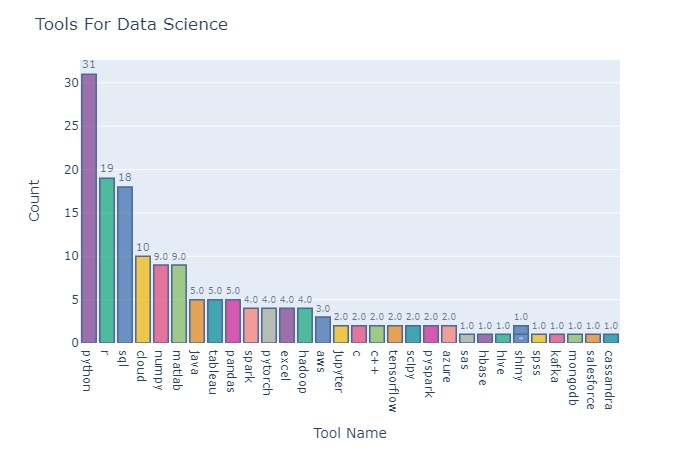

In [36]:
fig = px.bar(y=tools.Frequency,
       x=tools.ToolName,
       orientation='v',
       color=tools.ToolName,
       text=tools.Frequency,
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=800, 
                  showlegend=False, 
                  xaxis_title="Tool Name",
                  yaxis_title="Count",
                  title="Tools For Data Science")
fig.show(renderer="jpg")

As expected the most popular language python in data science hold top position. R & sql are used in data analytics.

# Thank you !!